In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.6.0'

In [4]:
tf.keras.__version__

'2.6.0'

keras is High level API for tensorflow

In [5]:
tf.config.list_physical_devices("GPU") # Checking how many GPU avalaible

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_physical_devices("CPU") # Checking how many cpu avalaible

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

MNIST Dataset is hello world classification image /ANN example


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
mnist =tf.keras.datasets.mnist

In [9]:
(X_train_full,y_train_full),(X_test,y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
#Here image is 28 x28 very small image so we can use
X_train_full.shape

(60000, 28, 28)

In [11]:
y_train_full.shape

(60000,)

In [12]:
# Print first element in the x 
X_train_full[0].shape

(28, 28)

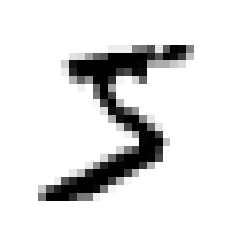

In [13]:
img = X_train_full[0]
plt.imshow(img,cmap='binary')
plt.axis("off")
plt.show()

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
#image each pixel 0 -255 ->i.e 2 ^8 8 bit image
# if it's RGB then 255X 255 X 3
# we need to resize based on model example VGG16 expecetd (224,224)
# Here the image size is 28 x 28 so no need to resize, jus re-use


In [16]:
img.max(),img.min()

(255, 0)

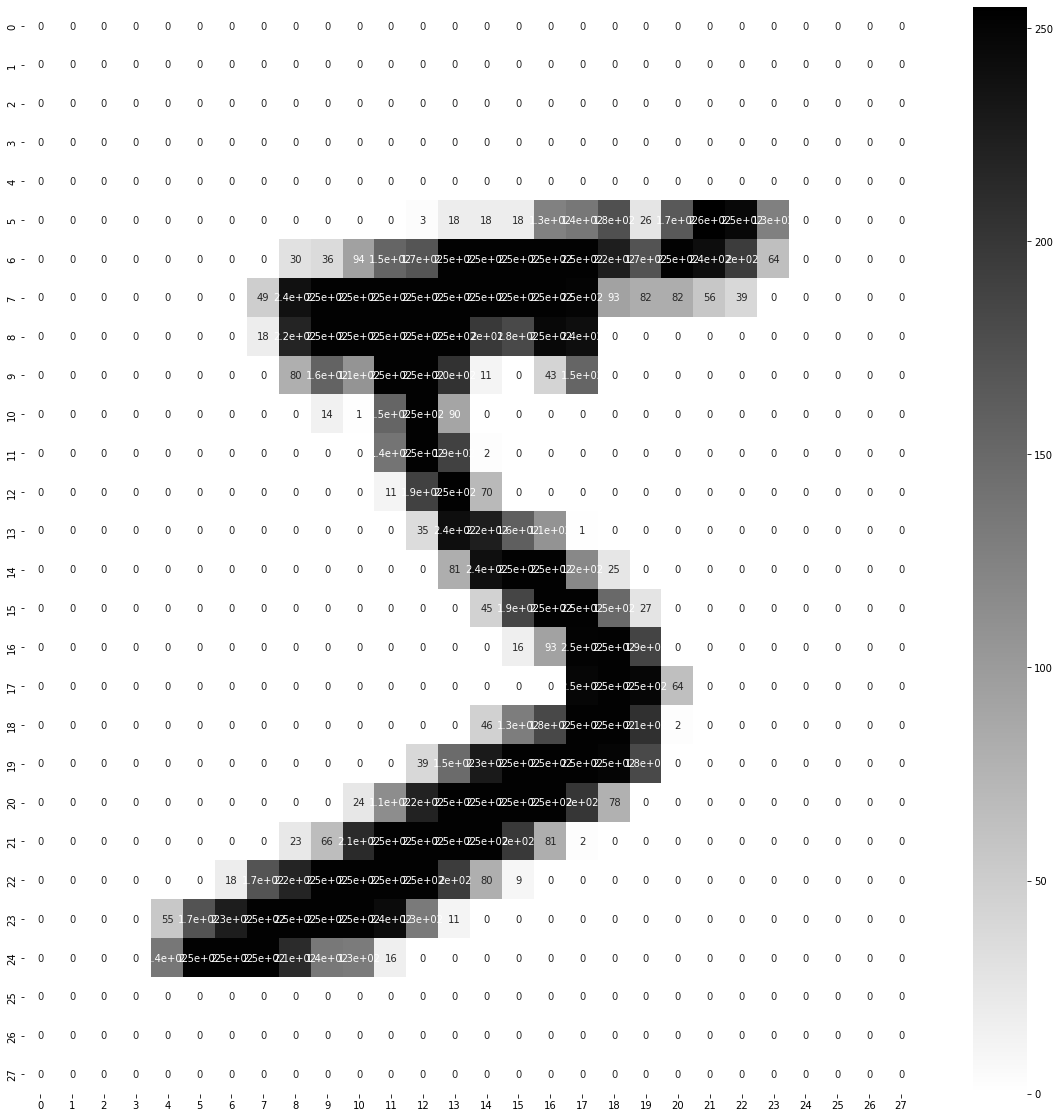

In [17]:
# Print the image using sns heat map
plt.figure(figsize=(20,20))
sns.heatmap(img,annot= True,cmap='binary')

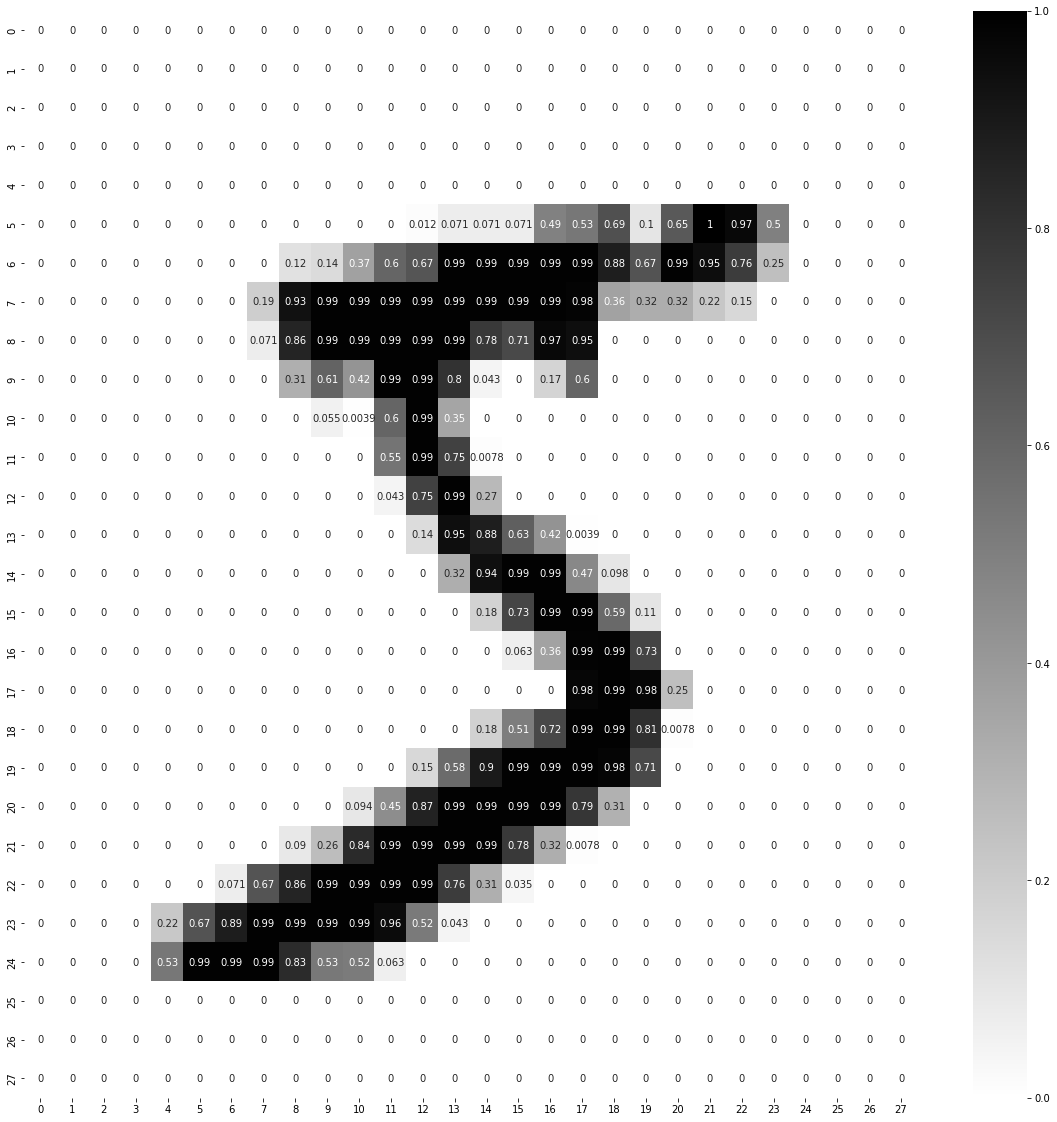

In [18]:
# We will normalize using max
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot= True,cmap='binary')

In [19]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


X_test = X_test / 255.

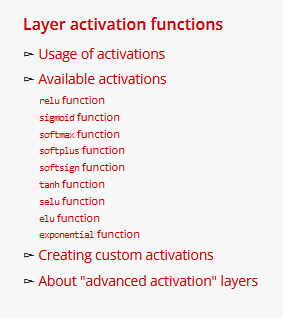

https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

In [20]:
# we need to flatten the input means 28x 28 convert to sigle array
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name = "inputLayer"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
          tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name = "outputlayer")] # Flat the input as 784 input


In [21]:
# we will create the model from above layer , we are creating as sequential model, becasue we are not skip any layer
model_clf = tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf.layers

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
# firstlayer * secondlayer + bias
# input* Weight +bias

784*300 + 300, 300*100 + 100, 100*10 + 10

(235500, 30100, 1010)

In [25]:
np.sum((235500, 30100, 1010))

266610

- we will get 784 flatten input
- Next layer we will get around 235500   ( 784 * 300 Weights) +300 
- Next layer ( 300 * 100) + 100 bias 
- output layer 

In [26]:
model_clf.layers[1].name

'hiddenLayer1'

In [27]:
# Here we will get array weigths & bias

In [28]:
# Here weights & bias are randoms initialized
weights, biases = model_clf.layers[1].get_weights()
print(len(weights))
print(len(biases))

784
300


In [29]:
# Before training compile the mode
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"  # optimiser used to converge 
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

# By default batch size = 32
# 55000 is training data size /default batch size 32 ( around 1719)
55000/32


In [30]:
55000/32

1718.75

In [31]:
# define Epocs
# Each epocs
# Each epoc randomly 1719 sample will take
# verboase how many printed in the note book
# here we are validating at the end of each epoc for that we are using 5000 datapoint
# we will get val loss and accuracy at end of each epoc.
# if we use more layer the accuracy will increase but model space will increase.
#
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6046 - accuracy: 0.8433 - val_loss: 0.3036 - val_accuracy: 0.9170
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2849 - accuracy: 0.9183 - val_loss: 0.2391 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2315 - accuracy: 0.9337 - val_loss: 0.2008 - val_accuracy: 0.9440
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1972 - accuracy: 0.9439 - val_loss: 0.1756 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1718 - accuracy: 0.9506 - val_loss: 0.1574 - val_accuracy: 0.9584
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1523 - accuracy: 0.9561 - val_loss: 0.1437 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1363 - accuracy: 0.9607 - val_loss: 0.1343 - val_accuracy:

After first epoc 1719 will use traing and we will get some weights and validate against the validation data points & will give validation accuray.

# we can see 26th epoc is good accuracy. If we want to stop we will use below methods
- Call back
- Early stop
- Tensorflow callback

In [32]:
# # Define batch size & veerbose
# EPOCHS = 30
# VALIDATION = (X_valid, y_valid)

# history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION,batch_size=128,verbose=1) 

In [33]:
history

In [34]:
# print the parameters
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [35]:
history.history

{'accuracy': [0.8432909250259399,
  0.918327271938324,
  0.9336909055709839,
  0.9439454674720764,
  0.9506000280380249,
  0.9561272859573364,
  0.9607454538345337,
  0.9648908972740173,
  0.9680363535881042,
  0.9703090786933899,
  0.9733454585075378,
  0.9750909209251404,
  0.977545440196991,
  0.9788545370101929,
  0.9807090759277344,
  0.9812909364700317,
  0.983018159866333,
  0.984109103679657,
  0.985836386680603,
  0.9861817955970764,
  0.9871090650558472,
  0.9878363609313965,
  0.9889090657234192,
  0.9893454313278198,
  0.9904181957244873,
  0.9912363886833191,
  0.9920363426208496,
  0.9923818111419678,
  0.9927272796630859,
  0.9934909343719482],
 'loss': [0.6045849323272705,
  0.284864217042923,
  0.23153623938560486,
  0.19723030924797058,
  0.1718221753835678,
  0.15231013298034668,
  0.13626863062381744,
  0.12343953549861908,
  0.11251954734325409,
  0.10322216898202896,
  0.09499729424715042,
  0.08801829814910889,
  0.08139331638813019,
  0.07593386620283127,
  0.07

In [36]:
type(history.history)

dict

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
# convert the dataframe
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.604585,0.843291,0.303585,0.9170
1,0.284864,0.918327,0.239100,0.9316
2,0.231536,0.933691,0.200841,0.9440
3,0.197230,0.943945,0.175582,0.9518
4,0.171822,0.950600,0.157421,0.9584
5,0.152310,0.956127,0.143735,0.9612
6,0.136269,0.960745,0.134285,0.9644
7,0.123440,0.964891,0.125915,0.9654
8,0.112520,0.968036,0.117345,0.9678
9,0.103222,0.970309,0.112660,0.9690


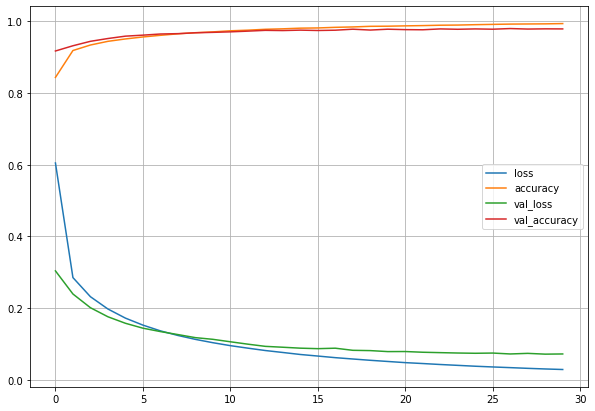

In [39]:
# Plot 
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [40]:
10000/32 # Test/default batch size 
print(10000/32)
model_clf.evaluate(X_test, y_test)

312.5
313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9790


[0.0703745037317276, 0.9789999723434448]

In [41]:
# Take first three test data & round off  with 3 didigts we can see 3rd item is around 99 as 2
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)
# predicted value is 7,2,1 
# value range is 0 to 9

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [42]:
y_prob.shape

(3, 10)

In [43]:
Y_pred= np.argmax(y_prob)
Y_pred

7

In [44]:
#provide the maximum values index
Y_pred= np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

In [45]:
# we need to specify axis =1 then only we will get exact predicted values
# if we will not give all predicted index sum


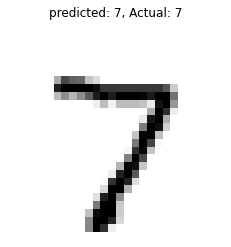

------------------------------------------------------------


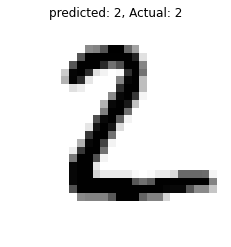

------------------------------------------------------------


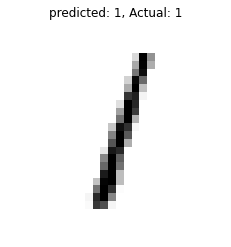

------------------------------------------------------------


In [46]:
# First three test data & prediction

for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [47]:
model_clf.save('ANN_model.h5')

In [48]:
# Zip functionality
a = (1,2,3)

b = (5,6,7)

for i, j in zip(a,b):
  print(i+j)

6
8
10
